In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import morphology
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from skimage import draw
import matplotlib as mpl
from matplotlib.colors import colorConverter

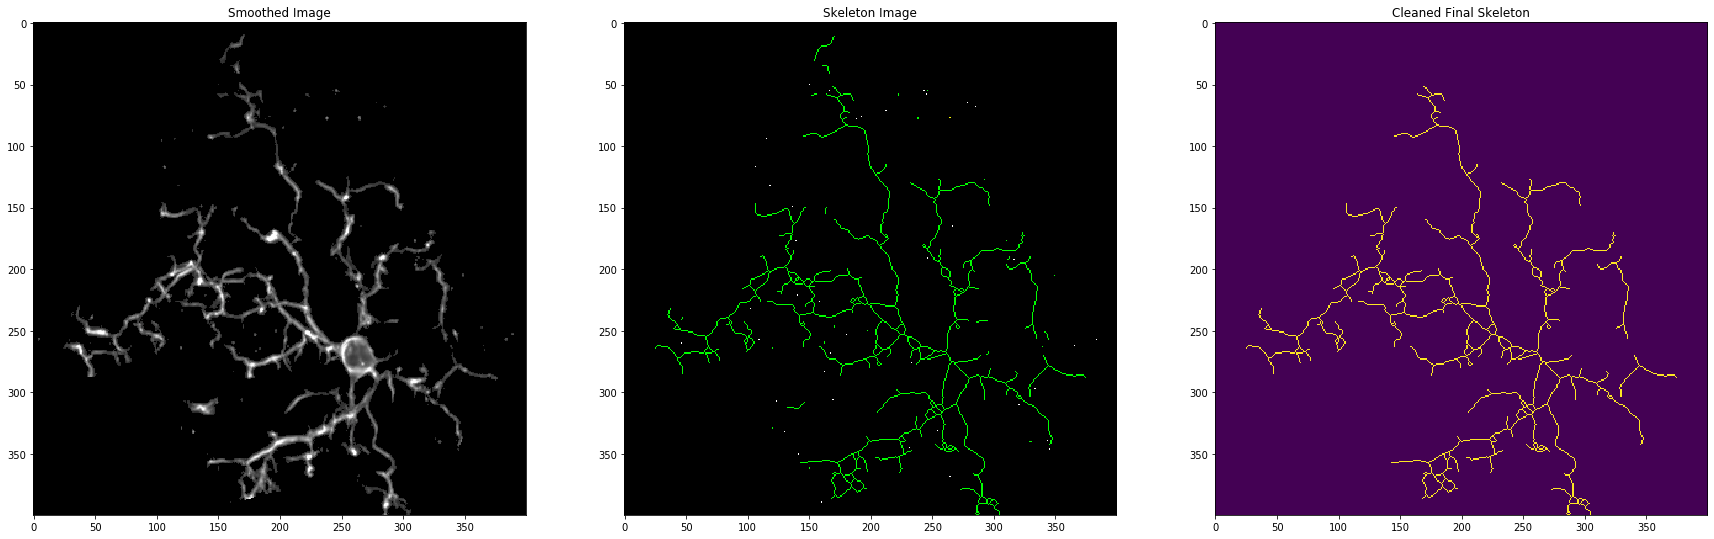

In [151]:
## cleaning function for images that already have the brightness bumppped (usually hit the auto button 3 times or so for 8bit images)
img = cv2.imread('C:\\Users\\Ben\\Desktop\\Untitled.tif')

## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

## detect where most of the background is coming from so you can get that out
num = np.histogram(dst.flatten(), bins = 50)

## gets the value where most background is, so that we can subtract it away
bg_val = num[1][np.argmax(num[0]) + 8]

new = np.where(dst < bg_val, 0, dst)
skeleton = skeletonize(new)

processed = morphology.remove_small_objects(skeleton.astype(bool), min_size=50, connectivity=25).astype(int)
processed = np.where(processed > 0, 255, 0)

new_arr = np.zeros(shape = (400, 400))

for i in range(len(processed)):
    for j in range(len(processed)):
        new_arr[i][j] = processed[i][j][1]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 35))
ax1.imshow(new)
ax1.set_title('Smoothed Image')
ax2.imshow(skeleton)
ax2.set_title('Skeleton Image')
ax3.imshow(new_arr)
ax3.set_title('Cleaned Final Skeleton');

In [143]:
z = [(200, 200)]

In [144]:
z[0][0]

200

In [145]:
rad_1 = 10
rad_2 = 20
rad_3 = 35
rad_4 = 50
rad_5 = 75
rad_6 = 100
rad_7 = 115
rad_8 = 130
rad_9 = 150
rad_10 = 175

rads = [rad_1, rad_2, rad_3, rad_4, rad_5, rad_6, rad_7, rad_8, rad_9, rad_10]

circles = ['1'] * len(rads)
i = -1
for rad in rads:
    i = i + 1
    arr = np.zeros((400, 400))
    rr, cc = draw.circle_perimeter(z[0][0], z[0][1], radius=rad, shape=arr.shape)
    arr[rr, cc] = 255
    circles[i] = arr

In [146]:
## function to simply calculate the number of intersections between the circle array and the skeleton array

def calc_intersection(arr):
    intersects = []

    for i in range(len(arr)):
        for j in range(len(new_arr)):
            if arr[i][j] == 255.0:
                if arr[i][j] == new_arr[i][j]:
                    intersects = np.append(intersects, [i, j])
                elif arr[i][j] != new_arr[i][j]:
                    pass
            elif arr[i][j] != 255.0:
                pass
    print(len(intersects) / 2)
    return(len(intersects) / 2, intersects)

In [148]:
s = []
intersections = []
for arr in circles:
    s = np.append(s, calc_intersection(arr)[0])
    intersections = np.append(intersections, calc_intersection(arr)[1])
    
x, y = intersections.reshape( int(len(intersections)/2) , 2).T

pd.DataFrame(s)

0.0
0.0
6.0
6.0
8.0
8.0
12.0
12.0
30.0
30.0
11.0
11.0
17.0
17.0
23.0
23.0
13.0
13.0
7.0
7.0


In [ ]:
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)
cmap2._init() # create the _lut array, with rgba values
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas


plt.figure(figsize = (15, 12))
plt.imshow(new_arr.T)
plt.imshow(circles[0], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[1], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[2], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[3], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[4], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[5], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[6], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[7], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[8], interpolation='nearest', cmap=cmap2, origin='lower')
plt.imshow(circles[9], interpolation='nearest', cmap=cmap2, origin='lower')
plt.scatter(z[0][0], z[0][1])
plt.scatter(x, y)
plt.title('Sholl Analysis')
plt.show()

In [94]:
## 20x images on our scope are .226 pixels per micron
## OR 4.42 microns per pixel


44.2